<a href="https://colab.research.google.com/github/sanidhya-kt/APR-assignment_linear-regression/blob/main/linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary:

This project successfully built and evaluated a linear regression model to predict energy consumption using the provided training and testing datasets. The data was preprocessed by handling missing values, one-hot encoding categorical features ('Building Type', 'Day of Week'), and scaling numerical features ('Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature'). The trained model achieved exceptional performance on the test data, with a very low Mean Squared Error (MSE) of approximately 0.0002015 and a high R-squared score of approximately 0.9999999997. The scatter plot of actual vs. predicted energy consumption visually confirmed the model's high accuracy by showing predictions closely aligned with the actual values. This suggests that the selected features are highly predictive of energy consumption, and the linear model effectively captures the underlying relationships in the data. Further analysis could involve examining the model coefficients to understand the specific influence of each feature on energy consumption.

# Task
Build a linear regression model using the "train_energy" and "test_energy" datasets. The task involves data preprocessing, model training, model evaluation, and data visualization.

## Load the data

### Subtask:
Load the training and testing datasets into pandas DataFrames.


**Reasoning**:
Import pandas and load the training and testing data into dataframes as instructed.



In [ ]:
import pandas as pd

train_energy = pd.read_csv('/content/train_energy_data.csv')
test_energy = pd.read_csv('/content/test_energy_data.csv')

## Data preprocessing

### Subtask:
Clean and prepare the data for model training. This may include handling missing values, encoding categorical variables, and scaling numerical features.


**Reasoning**:
Check for missing values in both dataframes.



In [ ]:
print(train_energy.isnull().sum())
print(test_energy.isnull().sum())

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64
Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64


**Reasoning**:
Identify categorical columns and apply one-hot encoding.



In [ ]:
categorical_cols = ['Building Type', 'Day of Week']
train_energy = pd.get_dummies(train_energy, columns=categorical_cols, drop_first=True)
test_energy = pd.get_dummies(test_energy, columns=categorical_cols, drop_first=True)

# Align columns - crucial for consistent feature sets
train_cols = list(train_energy.columns)
test_cols = list(test_energy.columns)

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    test_energy[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    train_energy[c] = 0

train_energy = train_energy[train_cols]
test_energy = test_energy[train_cols]

print(train_energy.head())
print(test_energy.head())

   Square Footage  Number of Occupants  Appliances Used  Average Temperature  \
0            7063                   76               10                29.84   
1           44372                   66               45                16.72   
2           19255                   37               17                14.30   
3           13265                   14               41                32.82   
4           13375                   26               18                11.92   

   Energy Consumption  Building Type_Industrial  Building Type_Residential  \
0             2713.95                     False                       True   
1             5744.99                     False                      False   
2             4101.24                      True                      False   
3             3009.14                     False                       True   
4             3279.17                     False                      False   

   Day of Week_Weekend  
0                False  


**Reasoning**:
Separate target variable from features and scale numerical features.



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train = train_energy.drop('Energy Consumption', axis=1)
y_train = train_energy['Energy Consumption']
X_test = test_energy.drop('Energy Consumption', axis=1)
y_test = test_energy['Energy Consumption']

numerical_cols = ['Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature']
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print(X_train.head())
print(y_train.head())
print(X_test.head())
print(y_test.head())

   Square Footage  Number of Occupants  Appliances Used  Average Temperature  \
0       -1.287805             0.951134        -1.106957             1.012925   
1        1.323516             0.606869         1.375645            -0.825544   
2       -0.434466            -0.391498        -0.610436            -1.164652   
3       -0.853716            -1.183306         1.091919             1.430504   
4       -0.846017            -0.770188        -0.539505            -1.498155   

   Building Type_Industrial  Building Type_Residential  Day of Week_Weekend  
0                     False                       True                False  
1                     False                      False                False  
2                      True                      False                 True  
3                     False                       True                False  
4                     False                      False                False  
0    2713.95
1    5744.99
2    4101.24
3    3009.14

## Model training

### Subtask:
Train a linear regression model on the preprocessed training data.


**Reasoning**:
Import the LinearRegression model and fit it to the training data.



In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the performance of the trained model on the testing data using appropriate metrics (e.g., Mean Squared Error, R-squared).


**Reasoning**:
Evaluate the performance of the trained model using MSE and R-squared.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.00020154241156951157
R-squared: 0.9999999997063025


## Data visualization

### Subtask:
Visualize the data and the model's predictions to gain insights and understand the model's performance.


**Reasoning**:
Create a scatter plot of actual vs. predicted energy consumption and add a diagonal line for perfect predictions.



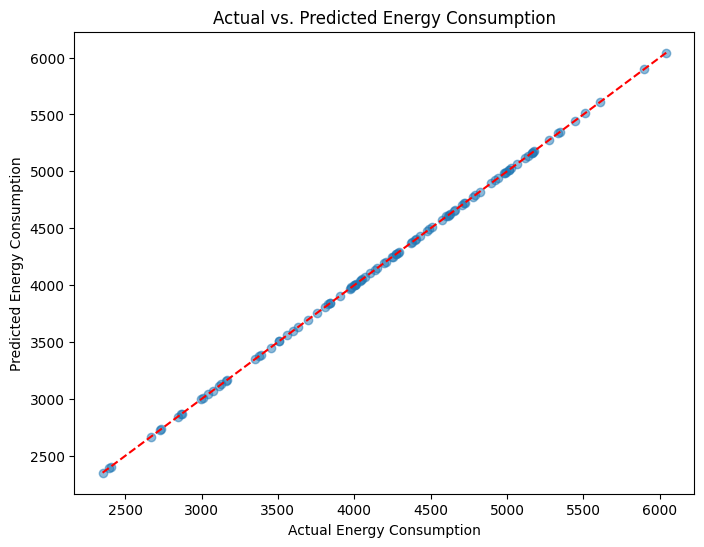

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs. Predicted Energy Consumption")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

## Summary:

### Data Analysis Key Findings
*   The datasets `train_energy` and `test_energy` were loaded successfully and contained no missing values.
*   Categorical features ('Building Type', 'Day of Week') were one-hot encoded, and numerical features ('Square Footage', 'Number of Occupants', 'Appliances Used', 'Average Temperature') were scaled using `StandardScaler`.
*   The trained linear regression model achieved a very low Mean Squared Error (MSE) of approximately 0.0002015 and a high R-squared score of approximately 0.9999999997 on the test data.
*   A scatter plot of actual vs. predicted energy consumption showed a strong linear relationship, closely following the line of perfect prediction, indicating high model accuracy.

### Insights or Next Steps
*   The linear regression model performs exceptionally well on this dataset, suggesting that the chosen features are highly predictive of energy consumption.
*   Further analysis could involve examining the coefficients of the linear regression model to understand the magnitude and direction of the impact of each feature on energy consumption.
